In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import Counter

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
from joblib import load

In [3]:
ada_clf = load('./savedModels/adaBoost.sav')
gb_clf = load('./savedModels/gradBoost.sav')
xgb_clf = load('./savedModels/xgBoost.sav')
cat_clf = load('./savedModels/catBoostJoblib.sav')

In [4]:
df = pd.read_csv('PCOS.csv')

df.columns = ['time','diagnosed','result','age','overweight','weightgain','periods','conceiving','chinHair','cheeksHair',
              'upperLipHair','betweenBreastHair','armsHair','innerThighHair','acneOrskinTag','hairThinning','darkPatch',
              'tiredness','moodSwings','exercise','eatOutside','cannedFood','city']

data = pd.DataFrame(df[df.diagnosed == 'Yes'])
data.reset_index(drop = True, inplace = True)
data.drop('time', axis = 1, inplace = True)
data.weightgain.fillna('abc', inplace = True)

def g(s):
    if (s == 'Yes'):
        return 1
    if (s == 'No'):
        return 0
    if (s == 'YES'):
        return 1
    if (s == 'NO'):
        return 0
    if (s == 'abc'):
        return 2

data['Diagnosed'] = data.diagnosed.apply(g)
data['Overweight'] = data.overweight.apply(g)
data['Weightgain'] = data.weightgain.apply(g)
data['Periods'] = data.periods.apply(g)
data['Conceiving'] = data.conceiving.apply(g)
data['AcneOrskinTag'] = data.acneOrskinTag.apply(g)
data['HairThinning'] = data.hairThinning.apply(g)
data['DarkPatch'] = data.darkPatch.apply(g)
data['Tiredness'] = data.tiredness.apply(g)
data['MoodSwings'] = data.moodSwings.apply(g)
data['CannedFood'] = data.cannedFood.apply(g)
data['City'] = data.city.apply(g)

del data['diagnosed']
del data['overweight']
del data['weightgain']
del data['periods']
del data['conceiving']
del data['acneOrskinTag']
del data['hairThinning']
del data['darkPatch']
del data['tiredness']
del data['moodSwings']
del data['cannedFood']
del data['city']

data['result'] = data['result'].map({'Yes': 1, 'No': 0, 'Yes(Detected Positive)': 1, 'No(Detected Negative)': 0})

X = data.drop(labels = ["result"],axis = 1)
y = data.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
from scipy import stats

pred_ada = ada_clf.predict(X_test)
pred_gb = gb_clf.predict(X_test)
pred_xgb = xgb_clf.predict(X_test)
pred_cat = cat_clf.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, stats.mode([pred_ada[i], pred_gb[i], pred_xgb[i], pred_cat[i]]))

In [6]:
from sklearn.metrics import f1_score, recall_score, precision_score

#precision of ada_gb_xgb_cat
print('precision_ada: {}'.format(precision_score(y_test, pred_ada, average = 'binary')))
print('precision_gb: {}'.format(precision_score(y_test, pred_gb, average = 'binary')))
print('precision_xgb: {}'.format(precision_score(y_test, pred_xgb, average = 'binary')))
print('precision_cat: {}'.format(precision_score(y_test, pred_cat, average = 'binary')))
print("======================================")

#recall of ada_gb_xgb_cat
print('recall_ada: {}'.format(recall_score(y_test, pred_ada, average = 'binary')))
print('recall_gb: {}'.format(recall_score(y_test, pred_gb, average = 'binary')))
print('recall_xgb: {}'.format(recall_score(y_test, pred_xgb, average = 'binary')))
print('recall_cat: {}'.format(recall_score(y_test, pred_cat, average = 'binary')))
print("======================================")

# precision of ada_gb_xgb_cat 
print('f1_score_ada: {}'.format(f1_score(y_test, pred_ada, average = 'binary')))
print('f1_score_gb: {}'.format(f1_score(y_test, pred_gb, average = 'binary')))
print('f1_score_xgb: {}'.format(f1_score(y_test, pred_xgb, average = 'binary')))
print('f1_score_cat: {}'.format(f1_score(y_test, pred_cat, average = 'binary')))

precision_ada: 0.9069767441860465
precision_gb: 0.8695652173913043
precision_xgb: 0.9090909090909091
precision_cat: 0.9523809523809523
recall_ada: 0.975
recall_gb: 1.0
recall_xgb: 1.0
recall_cat: 1.0
f1_score_ada: 0.9397590361445783
f1_score_gb: 0.9302325581395349
f1_score_xgb: 0.9523809523809523
f1_score_cat: 0.975609756097561


In [7]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.90')

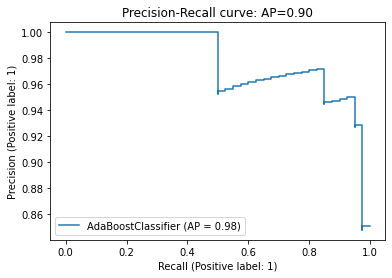

In [8]:
# AdaBoostClf

average_precision = average_precision_score(y_test, pred_ada)
disp = plot_precision_recall_curve(ada_clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [9]:
disp.precision

array([0.85106383, 0.84782609, 0.86666667, 0.88636364, 0.90697674,
       0.92857143, 0.92682927, 0.95      , 0.94871795, 0.94736842,
       0.94594595, 0.94444444, 0.97142857, 0.97058824, 0.96969697,
       0.96875   , 0.96774194, 0.96666667, 0.96551724, 0.96428571,
       0.96296296, 0.96153846, 0.96      , 0.95833333, 0.95652174,
       0.95454545, 0.95238095, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [10]:
disp.recall

array([1.   , 0.975, 0.975, 0.975, 0.975, 0.975, 0.95 , 0.95 , 0.925,
       0.9  , 0.875, 0.85 , 0.85 , 0.825, 0.8  , 0.775, 0.75 , 0.725,
       0.7  , 0.675, 0.65 , 0.625, 0.6  , 0.575, 0.55 , 0.525, 0.5  ,
       0.5  , 0.475, 0.45 , 0.425, 0.4  , 0.375, 0.35 , 0.325, 0.3  ,
       0.275, 0.25 , 0.225, 0.2  , 0.175, 0.15 , 0.125, 0.1  , 0.075,
       0.05 , 0.025, 0.   ])

In [11]:
disp.average_precision

0.9767561214955266

In [12]:
disp.estimator_name

'AdaBoostClassifier'

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


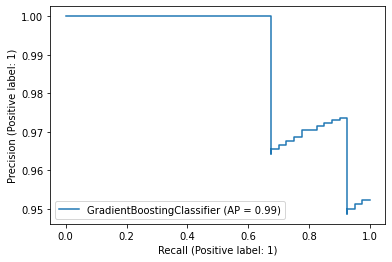

In [13]:
#Gradient Boosting
gb_disp = plot_precision_recall_curve(gb_clf, X_test, y_test)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


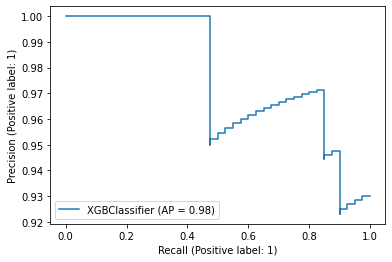

In [14]:
xgb_disp = plot_precision_recall_curve(xgb_clf, X_test, y_test)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


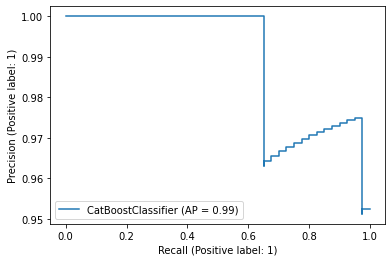

In [15]:
cat_disp = plot_precision_recall_curve(cat_clf, X_test, y_test)

In [16]:
metrics = pd.DataFrame(disp.precision, columns=['ada_precision'])

In [17]:
metrics.head()

,ada_precision
0,0.851064
1,0.847826
2,0.866667
3,0.886364
4,0.906977


In [18]:
metrics['ada_recall'] = disp.recall

In [19]:
metrics.shape

(48, 2)

In [20]:
metrics.to_csv('./plots/adapr.csv')

In [21]:
gbm_pr = pd.DataFrame({'gbm_precision':gb_disp.precision, 'gbm_recall':gb_disp.recall})

In [22]:
gbm_pr.to_csv('./plots/gbmpr.csv')

In [23]:
xg_pr = pd.DataFrame({'xg_precision':xgb_disp.precision, 'xg_recall':xgb_disp.recall})

In [24]:
xg_pr.to_csv('./plots/xgpr.csv')

In [25]:
cat_pr = pd.DataFrame({'cat_precision':cat_disp.precision, 'cat_recall':cat_disp.recall})
cat_pr.to_csv('./plots/catpr.csv')